In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import re
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
import warnings

# natural language processing toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

print("Current working directory: ", os.getcwd())
wd = os.getcwd()
# If current working directory is incorrect, use os.chdir("path")
# Edit the name of the data file from "Movie Review" into "MovieReview"
# and should be contained in the current working directory

Current working directory:  /Users/swislar/Desktop/IT1244/Project


In [32]:
def count_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return 1 if soup.find() else 0


def count_special(text):
    return 1 if re.search(r'\W', text) else 0


def count_words(text):
    clean = BeautifulSoup(text, "html.parser").get_text()
    clean = re.sub("[^a-zA-Z0-9]", " ", clean)
    word_tokens = clean.split()
    return len(word_tokens)


def loadAllData(WD=os.getcwd()):
    '''
    WD: Current working directory containing datasets- os.getcwd() 
    RETURN: 3D list for [0]: pos, [1]: neg - [specialCount, htmlCount, totalCount] [2]: wordCount
    '''
    # Initialise the dataframe
    posTotal = 0
    posHTML = 0
    posSpecial = 0
    negTotal = 0
    negHTML = 0
    negSpecial = 0
    wordCount = []
    posWD = os.path.join(WD, "MovieReview/data/pos")
    negWD = os.path.join(WD, "MovieReview/data/neg")
    # Read positively classified text
    for filename in tqdm(os.listdir(posWD), desc='Processing Positive Reviews'):
        with open(os.path.join(posWD, filename), "r") as file:
            f = file.read()
            posTotal += 1
            posHTML += count_html(f)
            posSpecial += count_special(f)
            wordCount.append(count_words(f))
    # Repeat for negative text
    for filename in tqdm(os.listdir(negWD), desc='Processing Negative Reviews'):
        with open(os.path.join(negWD, filename), "r") as file:
            f = file.read()
            negTotal += 1
            negHTML += count_html(f)
            negSpecial += count_special(f)
            wordCount.append(count_words(f))
    return [[posSpecial, posHTML], [negSpecial, negHTML], [posTotal, negTotal], wordCount]

In [34]:
# Load data (approx. 30s)
counts = loadAllData()

Processing Negative Reviews: 100%|██████████| 25000/25000 [00:08<00:00, 2911.88it/s]


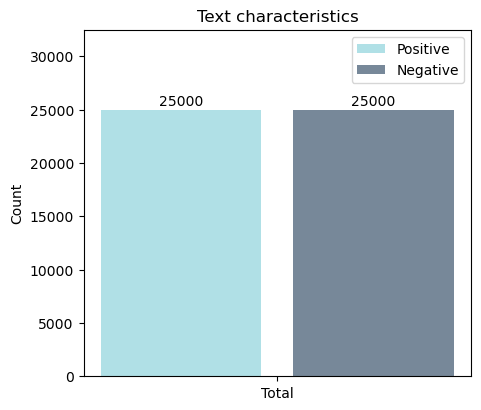

In [52]:
total_pos = counts[2][0]
total_neg = counts[2][1]

categories = ["Total"]
x = np.arange(len(categories))
width = 0.25
bar_spacing = 0.05

fig, ax = plt.subplots(figsize=(5, 4.5))

bars1 = ax.bar(x - width/2 - bar_spacing/2, total_pos,
               width, label='Positive', color='powderblue')
bars2 = ax.bar(x + width/2 + bar_spacing/2, total_neg,
               width, label='Negative', color='lightslategray')

ax.set_ylabel('Count')
ax.set_title('Text characteristics')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


def add_counts(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')


add_counts(bars1)
add_counts(bars2)

ax.set_ylim(0, max(total_pos, total_neg) * 1.3)

plt.show()

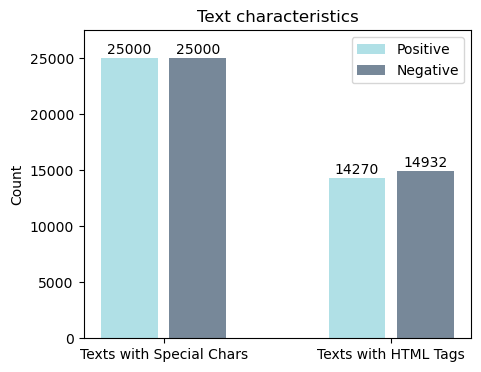

In [39]:
pos_counts = counts[0]
neg_counts = counts[1]

categories = ['Texts with Special Chars', 'Texts with HTML Tags']
x = np.arange(len(categories))
width = 0.25
bar_spacing = 0.05

fig, ax = plt.subplots(figsize=(5, 4))

bars1 = ax.bar(x - width/2 - bar_spacing/2, pos_counts,
               width, label='Positive', color='powderblue')
bars2 = ax.bar(x + width/2 + bar_spacing/2, neg_counts,
               width, label='Negative', color='lightslategray')

ax.set_ylabel('Count')
ax.set_title('Text characteristics')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


def add_counts(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')


add_counts(bars1)
add_counts(bars2)

ax.set_ylim(0, max(max(pos_counts), max(neg_counts)) * 1.1)

plt.show()

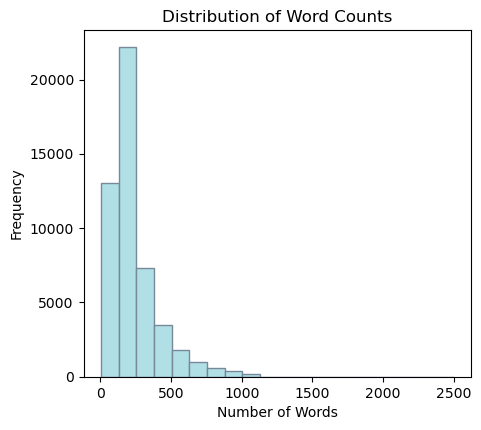

In [58]:
plt.figure(figsize=(5, 4.5))
plt.hist(counts[3], bins=20, color='powderblue',
         edgecolor='lightslategray')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show()